# THE TITANIC SURVIVAL SURVEY


### SUBMITTED BY: DRISHTI AGARWAL

<b><font size="4" style: color="black">DESCRIPTION<font></b>
 

<img title="RMS TITANIC" src="./titanic.jpeg" width="500" height="500">

<b><font size="3" style: color="brown"><i>"The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history."</i><font></b>
<b><font size="3" style: color="brown">The dataset that is analyzed holds the details of 899 passengers on board who either survived the disaster or unfortunately died, along with their details. Here we will first study the raw data and convert it into much more usable form through data wrangling, then we will scale the values and encode the character type values of some columns for data visualization and model selection/application.<font></b>  

## Importing the Libraries

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix,confusion_matrix
import seaborn as sns

## Loading the dataset

In [129]:
df = pd.read_csv("./train.csv")
print("The dataset is as follows-")
df.head()

The dataset is as follows-


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [130]:
print("The columns in the dataset are-")
df.columns

The columns in the dataset are-


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [131]:
print("The number of row and columns respectively-")
df.shape

The number of row and columns respectively-


(891, 12)

## Data Wrangling

In [132]:
#df.PassengerId.unique()

In [133]:
#df.Name.unique()

<b><font size="3" style: color="purple"> 1.Columns like PassengerId and Name will have unique values and are not required. <font></b>

<b><font size="3" style: color="purple"> 2.The output column Survived shows two unique values indicating two classification results i.e. not survived and survived <font></b>

In [134]:
df[['Pclass','Survived']].groupby('Pclass',as_index=False).count()

,Pclass,Survived
0,1,216
1,2,184
2,3,491


In [135]:
df[['Sex','Survived']].groupby('Sex',as_index=False).count()

,Sex,Survived
0,female,314
1,male,577


In [136]:
df[['Age','Survived']].groupby('Age',as_index=False).count()

,Age,Survived
0,0.42,1
1,0.67,1
2,0.75,2
3,0.83,2
4,0.92,1
...,...,...
83,70.00,2
84,70.50,1
85,71.00,2
86,74.00,1


In [137]:
df[['SibSp','Survived']].groupby('SibSp',as_index=False).count()

,SibSp,Survived
0,0,608
1,1,209
2,2,28
3,3,16
4,4,18
5,5,5
6,8,7


In [138]:
df[['Parch','Survived']].groupby('Parch',as_index=False).count()

,Parch,Survived
0,0,678
1,1,118
2,2,80
3,3,5
4,4,4
5,5,5
6,6,1


In [139]:
df[['Ticket','Survived']].groupby('Ticket',as_index=False).count()

,Ticket,Survived
0,110152,3
1,110413,3
2,110465,2
3,110564,1
4,110813,1
...,...,...
676,W./C. 6608,4
677,W./C. 6609,1
678,W.E.P. 5734,1
679,W/C 14208,1


In [140]:
df[['Fare','Survived']].groupby('Fare',as_index=False).count()

,Fare,Survived
0,0.0000,15
1,4.0125,1
2,5.0000,1
3,6.2375,1
4,6.4375,1
...,...,...
243,227.5250,4
244,247.5208,2
245,262.3750,2
246,263.0000,4


In [141]:
df[['Cabin','Survived']].groupby('Cabin',as_index=False).count()

,Cabin,Survived
0,A10,1
1,A14,1
2,A16,1
3,A19,1
4,A20,1
...,...,...
142,F33,3
143,F38,1
144,F4,2
145,G6,4


In [142]:
df[['Embarked','Survived']].groupby('Embarked',as_index=False).count()

,Embarked,Survived
0,C,168
1,Q,77
2,S,644


<b><font size="3" style: color="purple"> 3.The columns Age,Cabin,Ticket and Fare shows no grouping properties due to high number of different column values <font></b>

In [143]:
df[['Cabin','Survived']].groupby('Cabin',as_index=False).mean()

,Cabin,Survived
0,A10,0.0
1,A14,0.0
2,A16,1.0
3,A19,0.0
4,A20,1.0
...,...,...
142,F33,1.0
143,F38,0.0
144,F4,1.0
145,G6,0.5


In [144]:
df[['Ticket','Survived']].groupby('Ticket',as_index=False).mean()

,Ticket,Survived
0,110152,1.000000
1,110413,0.666667
2,110465,0.000000
3,110564,1.000000
4,110813,1.000000
...,...,...
676,W./C. 6608,0.000000
677,W./C. 6609,0.000000
678,W.E.P. 5734,0.000000
679,W/C 14208,0.000000


<b><font size="3" style: color="purple">4.The columns Cabin and Ticket have alphanumeric value that are unique and cannot be grouped,also the mean survival for each row value is very low<font></b>

In [145]:
print("The null value in each column is -")
df.isnull().sum()

The null value in each column is -


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [146]:
df.Age.agg(['mean','median'])


mean      29.699118
median    28.000000
Name: Age, dtype: float64

In [147]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [148]:
df.fillna({'Age':28,'Embarked':'S'},inplace=True)

<b><font size="3" style: color="purple">5.The null values in Age and Embarked columns were replaced by its mean and maximum count respectively<font></b>

In [149]:
y = df.Survived

In [150]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [151]:
x = df.drop(['PassengerId','Survived','Name','Ticket','Cabin'],axis=1)

In [152]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


<b><font size="3" style: color="purple">6.Seperating the output column and the features as y and x respectively<font></b> 

## Data Scaling

In [153]:
scaler = StandardScaler()
x.iloc[:,[2,3,5]] = scaler.fit_transform(x.iloc[:,[2,3,5]] )
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,-0.565736,0.432793,0,-0.502445,S
1,1,female,0.663861,0.432793,0,0.786845,C
2,3,female,-0.258337,-0.474545,0,-0.488854,S
3,1,female,0.433312,0.432793,0,0.420730,S
4,3,male,0.433312,-0.474545,0,-0.486337,S


## Data Encoding

In [154]:
x1 =pd.get_dummies(data=x,columns=['Sex','Embarked','Parch','Pclass'])


In [155]:
x1.head()

,Age,SibSp,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Pclass_1,Pclass_2,Pclass_3
0,-0.565736,0.432793,-0.502445,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1
1,0.663861,0.432793,0.786845,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,-0.258337,-0.474545,-0.488854,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1
3,0.433312,0.432793,0.420730,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0
4,0.433312,-0.474545,-0.486337,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1


In [156]:
x = pd.concat((x.drop(['Sex','Embarked','Parch','Pclass'],axis=1),x1.drop(['Age','SibSp','Fare'],axis=1)),axis=1)


In [157]:
x.head()


,Age,SibSp,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Pclass_1,Pclass_2,Pclass_3
0,-0.565736,0.432793,-0.502445,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1
1,0.663861,0.432793,0.786845,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,-0.258337,-0.474545,-0.488854,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1
3,0.433312,0.432793,0.420730,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0
4,0.433312,-0.474545,-0.486337,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1


In [158]:
x.columns

Index(['Age', 'SibSp', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [159]:
x.shape

(891, 18)

## Data Visualization

<b><font size="3" style: color="green">1.Plot a graph to show difference in count values of survived column to check class imbalance.<font></b>

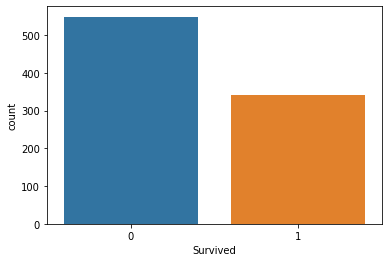

In [160]:
ax =sns.countplot(y,label='Count')

<b><font size="3" style: color="green">2.Now we will draw violin Plots and swarm Plots for all the features to analyze the data.<font></b>

In [161]:
data=pd.concat((x.iloc[:,0:9],y),axis=1)
data = pd.melt(data,id_vars="Survived",var_name="features",value_name="values")

The plot for first 5 rows-


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

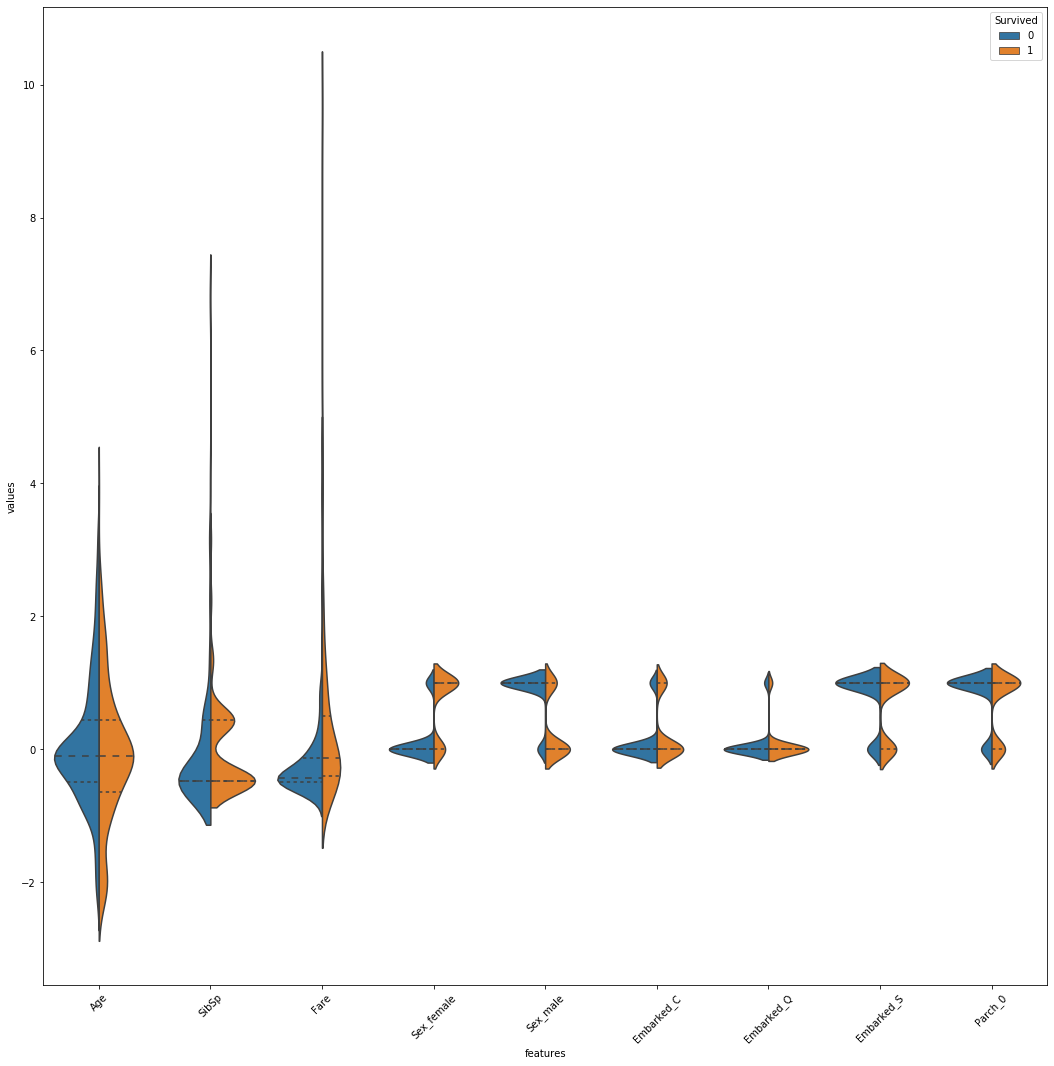

In [162]:
print("The plot for first 5 rows-")
plt.figure(figsize=(18,18))
sns.violinplot(x="features",y="values",hue="Survived",data=data,split=True,inner="quart")
plt.xticks(rotation=45)

In [163]:
data=pd.concat((x.iloc[:,9:18],y),axis=1)
data = pd.melt(data,id_vars="Survived",var_name="features",value_name="values")

The plot for next 5 rows-


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

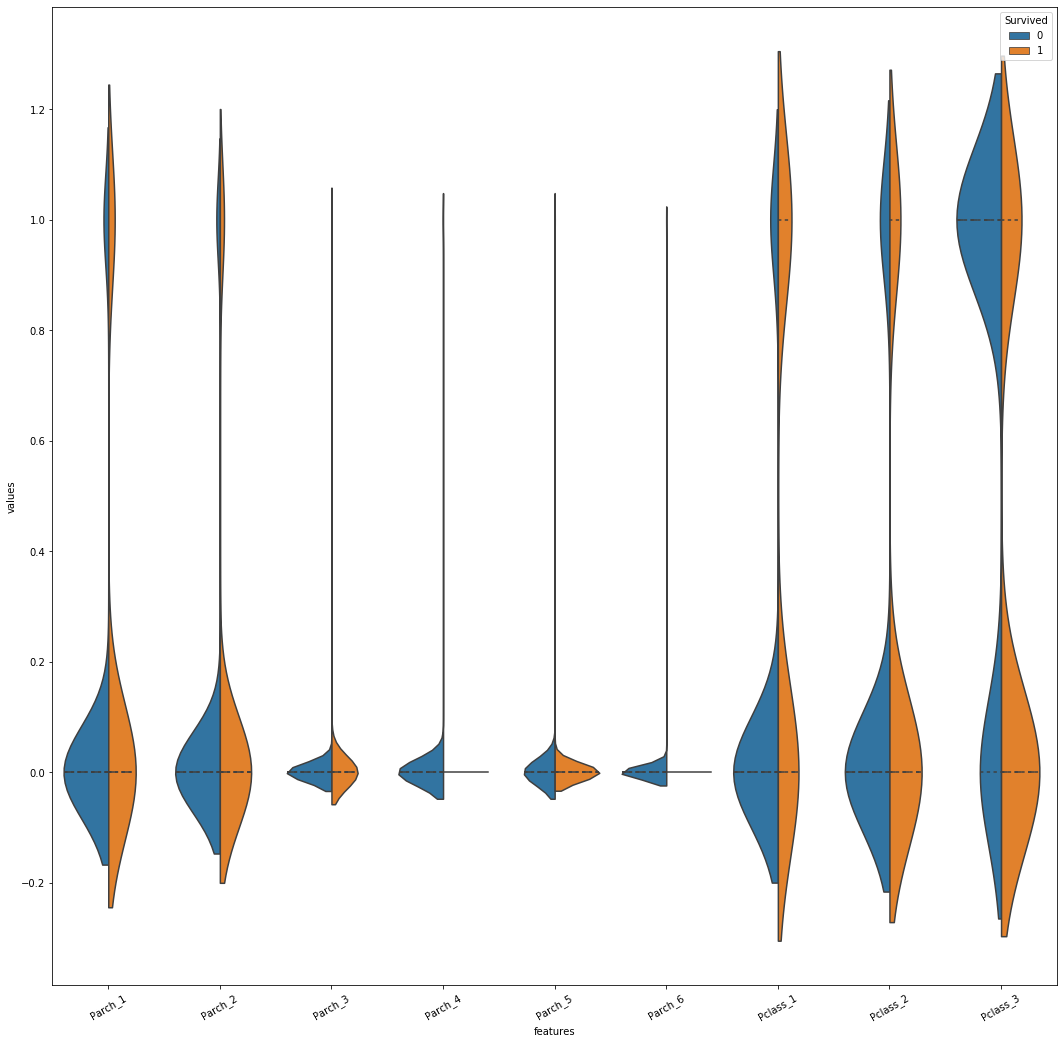

In [164]:
print("The plot for next 5 rows-")
plt.figure(figsize=(18,18))
sns.violinplot(x="features",y="values",hue="Survived",data=data,split=True,inner="quart")
plt.xticks(rotation=30)

<b><font size="3" style: color="green">3.Plot Heatmap to find any correlation existing between the features.<font></b>

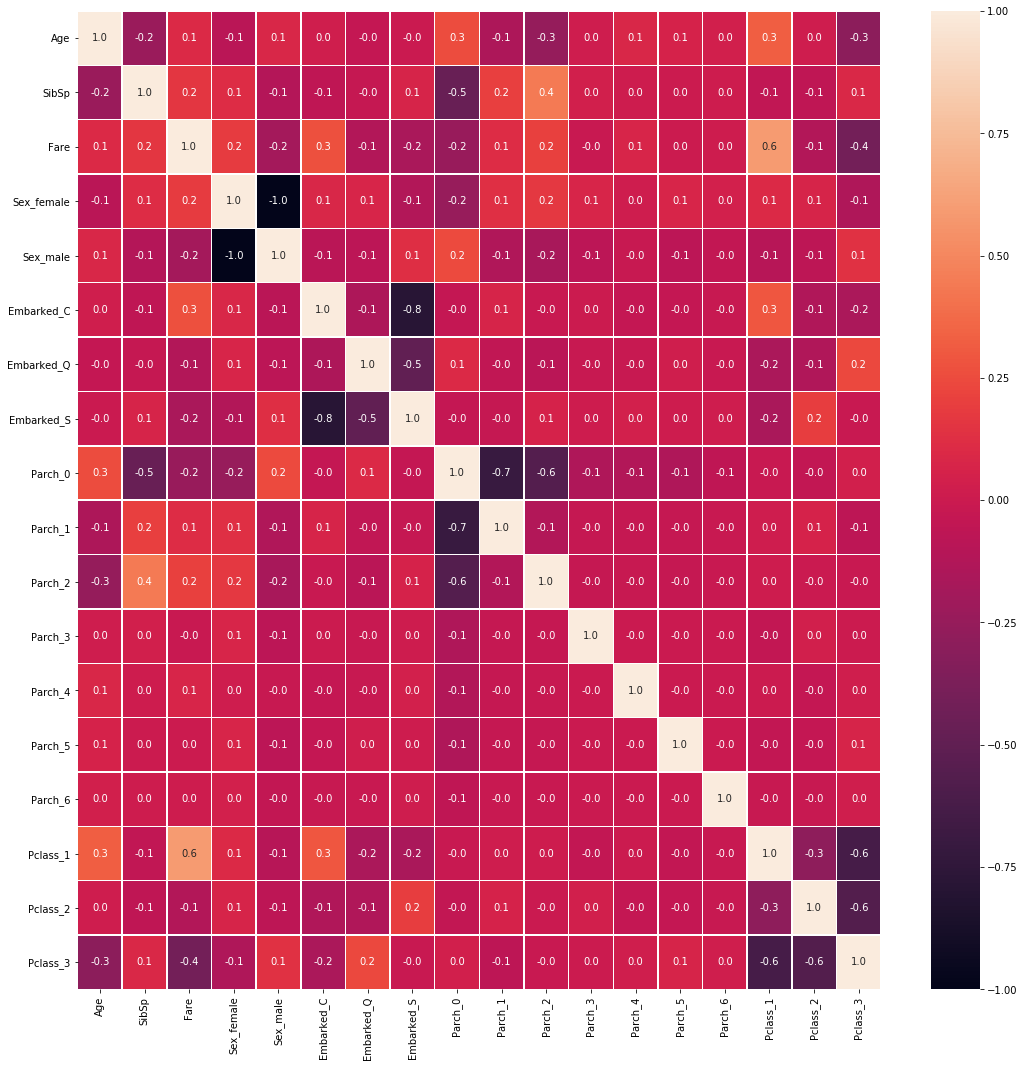

In [165]:
f,ax= plt.subplots(figsize=(18,18))
sns.heatmap(x.corr(),annot=True,linewidths=0.5,fmt='.1f',ax=ax)

<b><font size="3" style: color="green">4.From Violin plots it is clear that the row Embarked_Q will not contribute in final classfication result and no correlation feature exists which needs to be dropped.<font></b>

In [166]:
x=x.drop(['Embarked_Q'],axis=1)
x.columns

Index(['Age', 'SibSp', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_S', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4',
       'Parch_5', 'Parch_6', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

## Model Selection

In [167]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.25)

<b><font size="3" style: color="orange">After applying algorithms like Logistic Regression,Random forest and SVM classifier,we observed SVM model gives the best result after hyperparameter tuning.<font></b>

#### Logistic Regression

#### Random Forest Classifier

#### Support Vector Machine Classfier

In [168]:
from sklearn.svm import SVC
classifier = SVC(C=1,kernel='rbf',random_state=0,gamma='scale')
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0
 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0
 0]


In [169]:
acc = accuracy_score(Y_test,y_pred)
print("Accuracy =",acc)

Accuracy = 0.820627802690583


In [170]:
predict = cross_val_score(classifier, x , y , cv = 5).mean()
print("Cross_val_score =",predict)

Cross_val_score = 0.8271483271608814


In [171]:
print("Precision =",precision_score(Y_test,y_pred))

Precision = 0.8266666666666667


In [172]:
print("Recall =",recall_score(Y_test,y_pred))

Recall = 0.6966292134831461


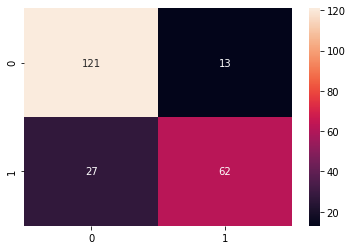

In [173]:
cm = confusion_matrix(Y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d");

<b><font size="3" style: color="brown">The Model is approximately 82% accurate.(the best accuracy achieved is shown in the image below.)<font></b>

<img title="RMS TITANIC" src="./accuracy.png" width="900" height="500">